In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dns.name
import json
import os
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from IPython.display import clear_output
from preprocessfns import *
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

In [2]:
# please download data to "../data" or specify the path to data here:
DataRawDir = "../data"

### DNS HTTPS RR Adoption Rate: apex and www
We read apex and www DNS HTTPS RR records and count its adoption rate.

If you want to reprocess, please set up **recompute=True**

In [30]:
recompute = False

In [31]:
# Time range beginning to end
start_d = datetime(2023,5,8)
end_d = datetime(2024,4,1)
ndays = (end_d - start_d).days
date_l0 = [start_d + timedelta(days=i) for i in range(ndays)]
print(date_l0[0], date_l0[-1])

2023-05-08 00:00:00 2024-03-31 00:00:00


In [3]:
df_httpsrr = pd.read_csv("../data/processed/alldom/adoption_apex_httpsrr.csv")

In [4]:
df_httpsrr_www = pd.read_csv("../data/processed/alldom/adoption_www_httpsrr.csv")

In [5]:
df_httpsrr['perc'] = df_httpsrr['num_httpsrr'].apply(lambda x: x / 10000)
df_httpsrr_www['perc'] = df_httpsrr_www['num_httpsrr'].apply(lambda x: x / 10000)
df_httpsrr['datetime'] = df_httpsrr['date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
df_httpsrr_www['datetime'] = df_httpsrr_www['date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

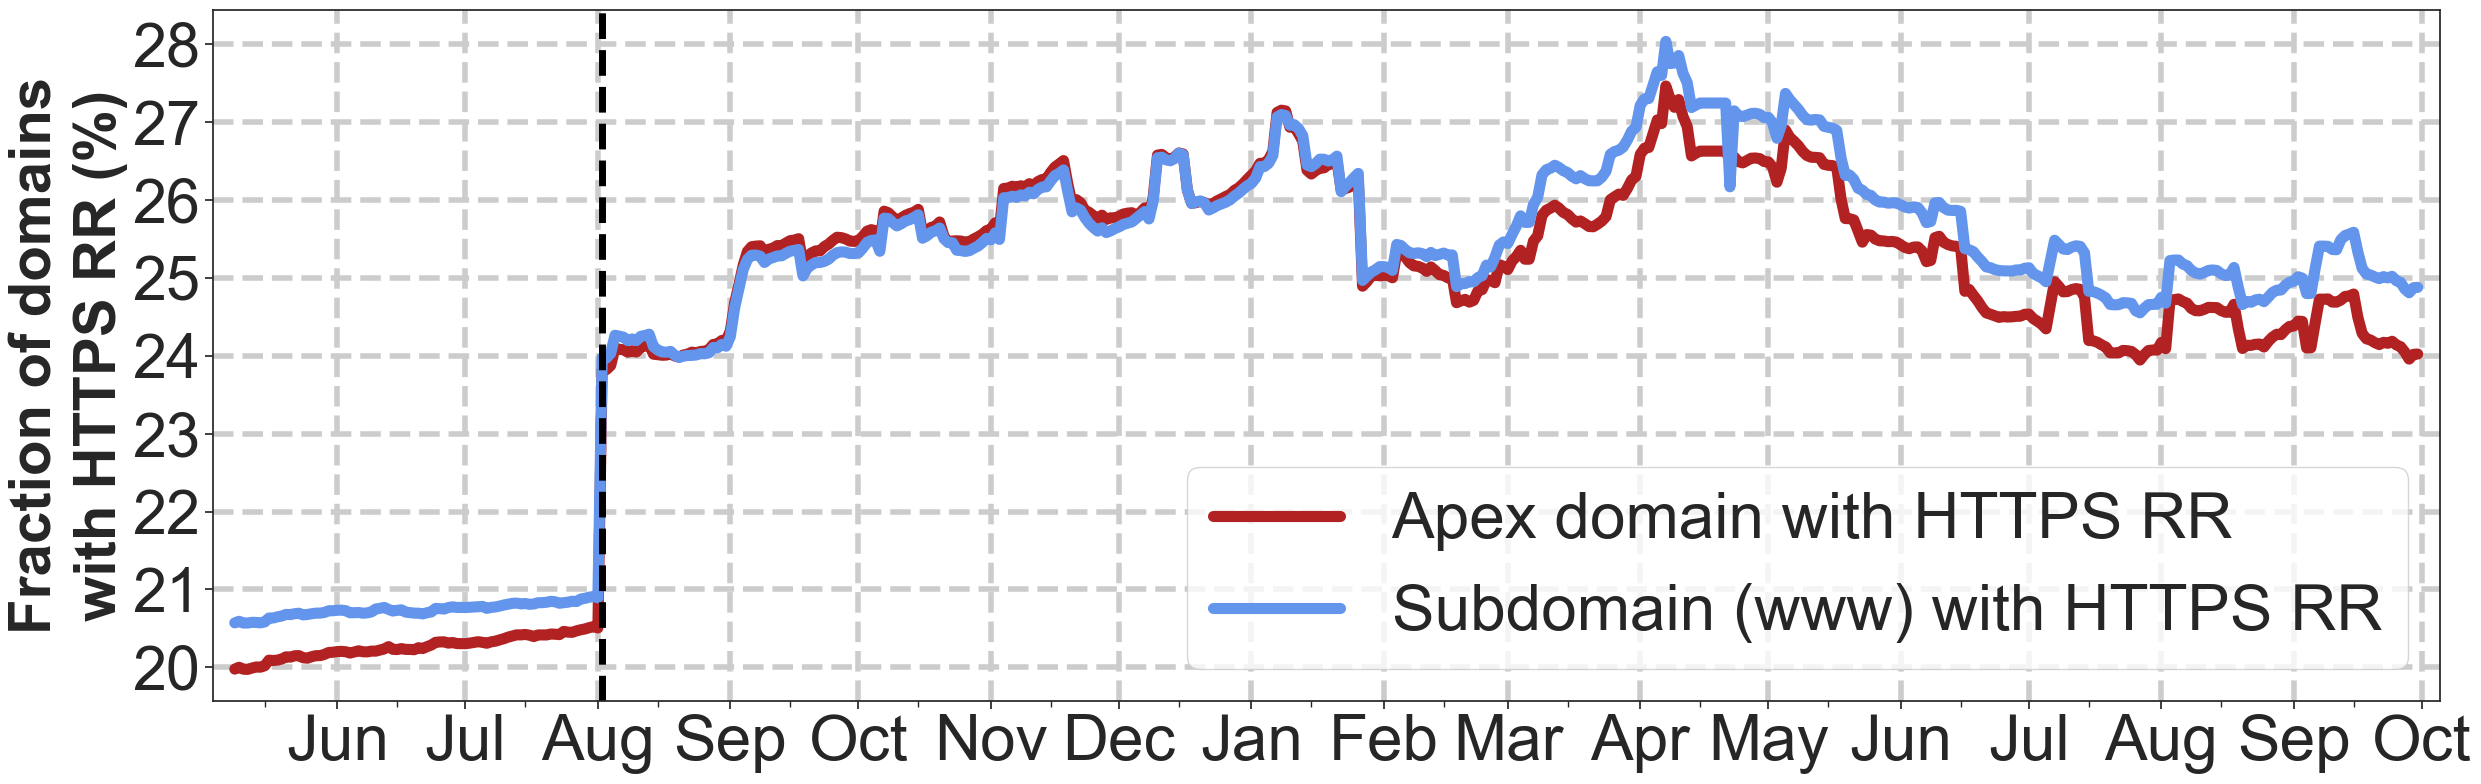

In [6]:
fig = plt.figure(figsize=(25,8))
sns.set(style="ticks")
ax = sns.lineplot(data=df_httpsrr, x="datetime", y="perc", linewidth=8, color='firebrick', \
                  label='Apex domain with HTTPS RR')
ax2 = sns.lineplot(data=df_httpsrr_www, x="datetime", y="perc", linewidth=8, color='cornflowerblue', \
                   label='Subdomain (www) with HTTPS RR')

ax.grid(True, linestyle='--', linewidth=4)

ax.axvline(x=datetime.strptime("2023-08-02", "%Y-%m-%d"), color="black", linestyle="dashed", linewidth=5)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax.set_xlabel('')
plt.xticks(fontsize=46)
plt.yticks(fontsize=44)
plt.ylabel("Fraction of domains\nwith HTTPS RR (%)", fontsize=42, labelpad=3, fontweight='bold')
plt.margins(x=.01)

plt.legend(fontsize=46, loc="lower right")
fig.tight_layout()
#fig.savefig('../figures/alldom_httpsrr.png', dpi=200)
plt.show()

### DNS HTTPS RR adoption: Overlapped Domains
Time range of overlapped domains are splitted into two time windows due to the change of tranco list:
1. 2023-05-08 to 2023-08-01
2. 2023-08-02 to 2024-03-31

In [13]:
start_d = datetime(2023,5,8)
end_d = datetime(2023,8,2)
ndays = (end_d - start_d).days
date_l1 = [start_d + timedelta(days=i) for i in range(ndays)]
print(date_l1[0],date_l1[-1])

2023-05-08 00:00:00 2023-08-01 00:00:00


In [14]:
start_d = datetime(2023,8,2)
end_d = datetime(2024,4,1)
ndays = (end_d - start_d).days
date_l2 = [start_d + timedelta(days=i) for i in range(ndays)]
print(date_l2[0], date_l2[-1])

2023-08-02 00:00:00 2024-03-31 00:00:00


In [15]:
recompute = False

In [16]:
# Read overlapped domain list
df_overlap1 = pd.read_csv("../data/processed/overlap/overlapdom_part1.csv")
df_overlap2 = pd.read_csv("../data/processed/overlap/overlapdom_part2.csv")

In [17]:
apex_httpsrr1 = pd.read_csv("../data/processed/overlap/adoption_apex_httpsrr1.csv")
apex_httpsrr2 = pd.read_csv("../data/processed/overlap/adoption_apex_httpsrr2.csv")
www_httpsrr1 = pd.read_csv("../data/processed/overlap/adoption_www_httpsrr1.csv")
www_httpsrr2 = pd.read_csv("../data/processed/overlap/adoption_www_httpsrr2.csv")

In [18]:
apex_httpsrr1['perc'] = apex_httpsrr1['num_httpsrr'].apply(lambda x: 100 * x / df_overlap1.shape[0])
apex_httpsrr2['perc'] = apex_httpsrr2['num_httpsrr'].apply(lambda x: 100 * x / df_overlap2.shape[0])
www_httpsrr1['perc'] = www_httpsrr1['num_httpsrr'].apply(lambda x: 100 * x / df_overlap1.shape[0])
www_httpsrr2['perc'] = www_httpsrr2['num_httpsrr'].apply(lambda x: 100 * x / df_overlap2.shape[0])

In [19]:
apex_httpsrr = pd.concat([apex_httpsrr1, apex_httpsrr2], ignore_index=True)
www_httpsrr = pd.concat([www_httpsrr1, www_httpsrr2], ignore_index=True)

In [20]:
apex_httpsrr['datetime'] = apex_httpsrr['date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
www_httpsrr['datetime'] = www_httpsrr['date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

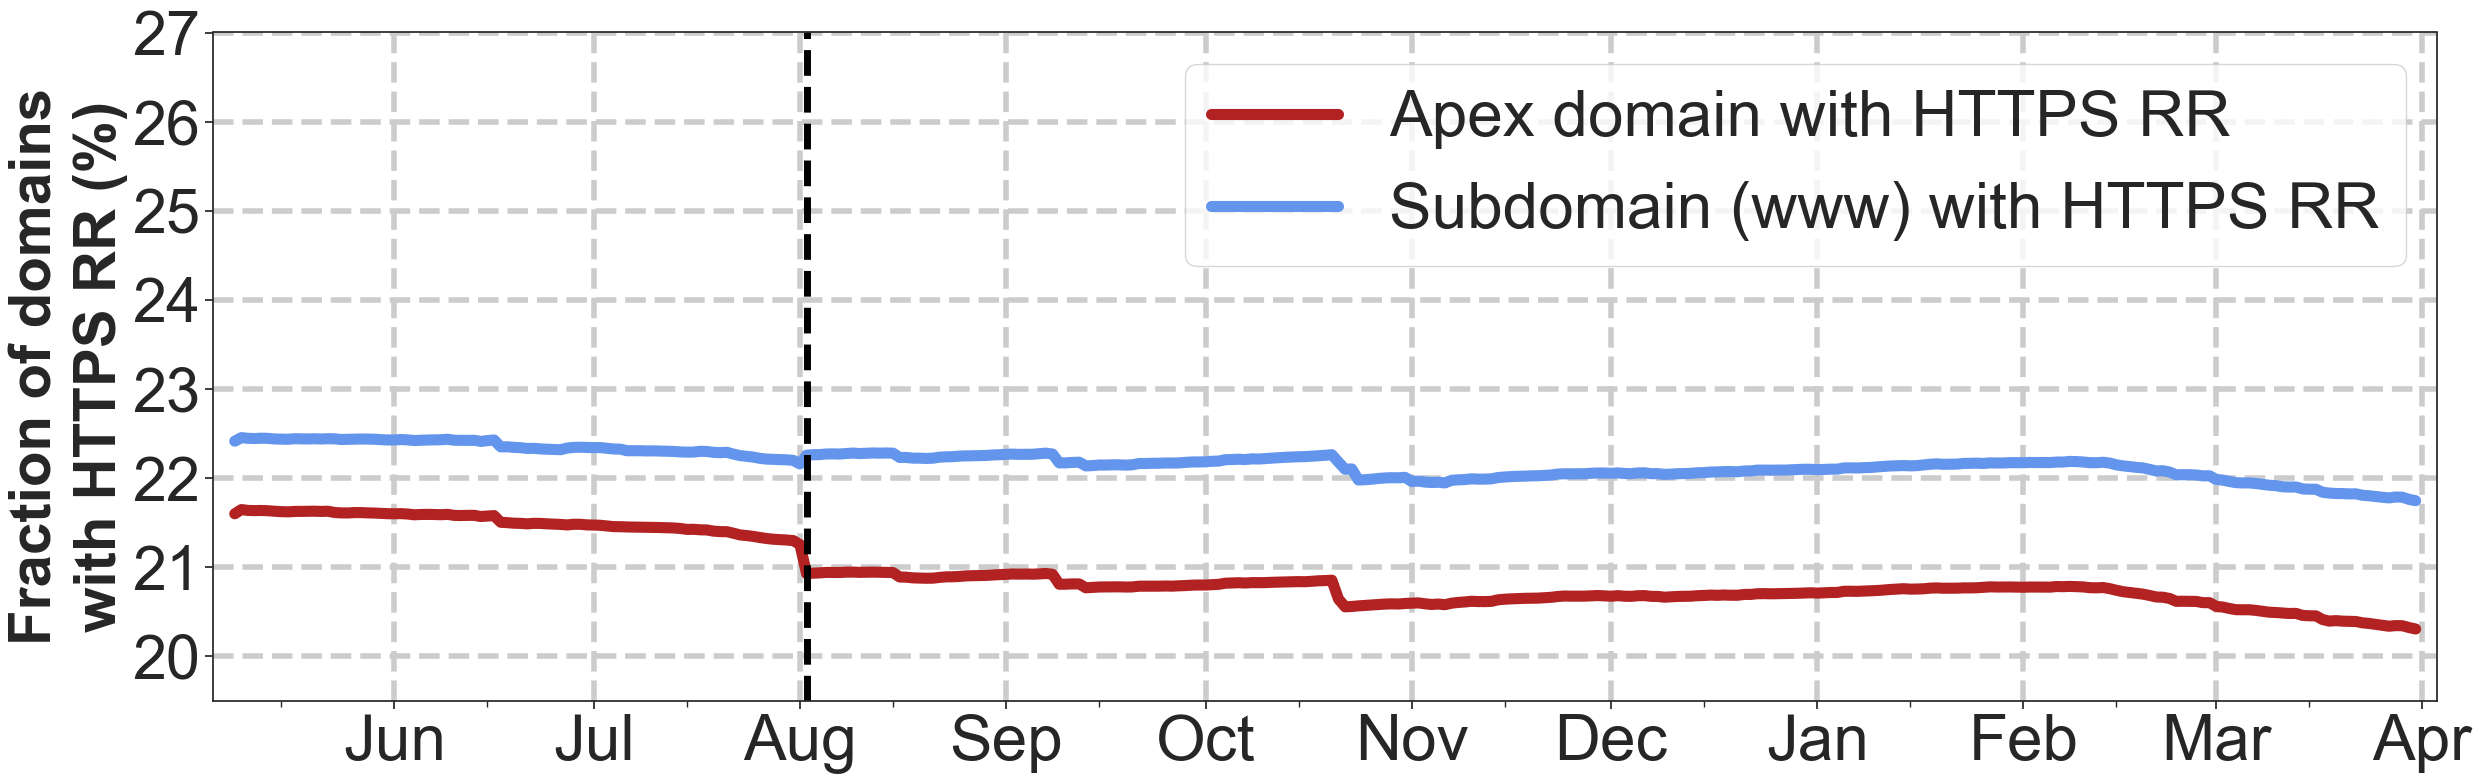

In [21]:
fig = plt.figure(figsize=(25,8))
sns.set(style="ticks")
ax = sns.lineplot(data=apex_httpsrr, x="datetime", y="perc", linewidth=8, color='firebrick', label='Apex domain with HTTPS RR')
ax2 = sns.lineplot(data=www_httpsrr, x="datetime", y="perc", linewidth=8, color='cornflowerblue', label='Subdomain (www) with HTTPS RR')
ax.grid(True, linestyle='--', linewidth=4)

ax.axvline(x=datetime.strptime("2023-08-02", "%Y-%m-%d"), color="black", linestyle="dashed", linewidth=5)

#ax.set_xlim(-0.05, 1.05)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax.set_ylim(19.5, 27)
ax.set_xlabel('')
ax.tick_params(axis='x')
plt.xticks(fontsize=46)
plt.yticks(fontsize=44)
plt.ylabel("Fraction of domains\nwith HTTPS RR (%)", fontsize=42, labelpad=3, fontweight='bold')
plt.margins(x=.01)

plt.legend(fontsize=46, loc="upper right")
fig.tight_layout()
#fig.savefig('../figures/overlapdom_httpsrr.png', dpi=200)
plt.show()